In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Getting a look at the distribution of each of the scores and ratios

In [10]:
data = pd.read_csv("dataset.csv")
data.head()

,full_path,file_name,lines_of_code,lines_of_text,verb_count,wccs,avg_wcc_size
0,../reproducibility-notebooks/00/0e8c55e68644e2...,Analises_e_Graficos.ipynb,2099,1083,7,[],0.000000
1,../reproducibility-notebooks/00/f62da5dcb9320b...,Peters_Joshua_Part2.ipynb,3963,404,32,"[{'adp_c', 'ru5p__D_c', 'atp_c', 'g3p_c', 'co2...",3.250000
2,../reproducibility-notebooks/00/f62da5dcb9320b...,Peters_Joshua_Part1.ipynb,1346,1706,47,"[{'solution', 'model', 'cobra'}, {'solutionv3'...",3.333333
3,../reproducibility-notebooks/00/f62da5dcb9320b...,Peters_Joshua_Part1-checkpoint.ipynb,1346,1505,40,"[{'solution', 'model', 'cobra'}, {'solutionv3'...",3.333333
4,../reproducibility-notebooks/00/f62da5dcb9320b...,Peters_Joshua_Part2-checkpoint.ipynb,2789,404,24,"[{'adp_c', 'ru5p__D_c', 'atp_c', 'g3p_c', 'co2...",2.714286


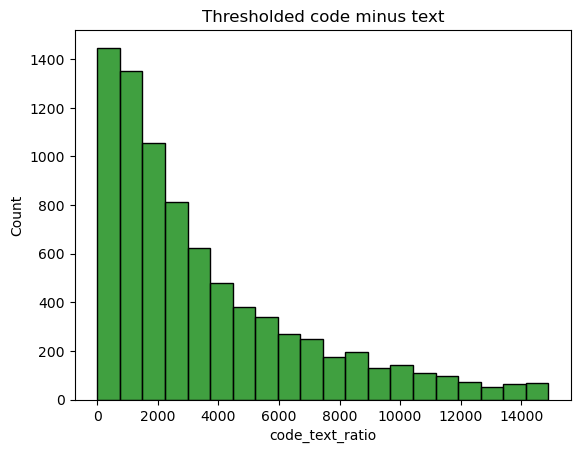

In [20]:
data['code_text_ratio'] = data['lines_of_code'] - data['lines_of_text']
filtered_ct = data[(data['code_text_ratio'] > 1) & (data['code_text_ratio'] < data['code_text_ratio'].quantile(0.95))]
sns.histplot(filtered_ct['code_text_ratio'], bins=20, color='green')
plt.title('Thresholded code minus text')
plt.show()

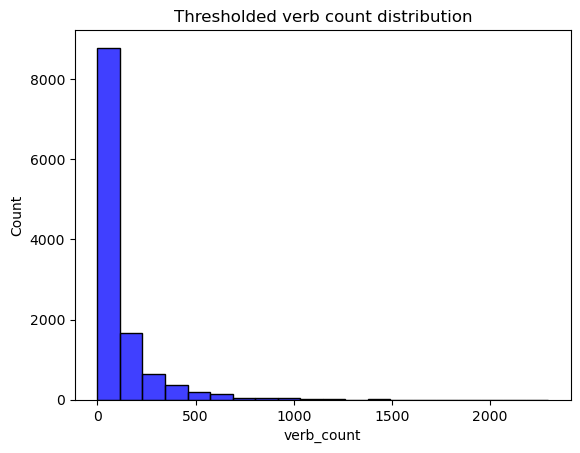

In [ ]:
filtered_verb = data[(data['verb_count'] > 1) & (data['verb_count'] < data['verb_count'].quantile(0.95))]
sns.histplot(data['verb_count'], bins=20, color='blue')
plt.title('Thresholded verb count distribution')
plt.show()

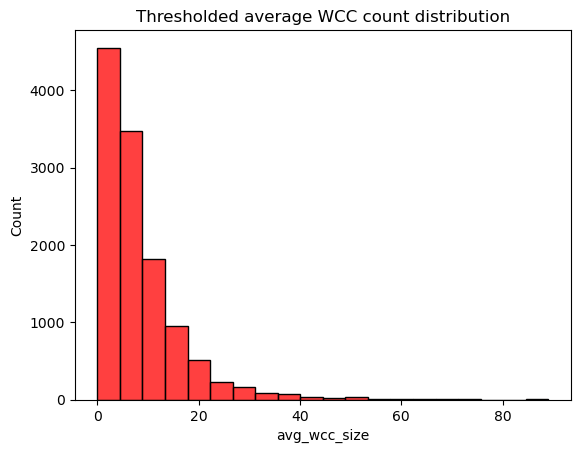

In [23]:
filtered_verb = data[(data['avg_wcc_size'] > 1) & (data['avg_wcc_size'] < data['avg_wcc_size'].quantile(0.95))]
sns.histplot(data['avg_wcc_size'], bins=20, color='red')
plt.title('Thresholded average WCC count distribution')
plt.show()

## Getting a few samples from each quartile of each metric

In [29]:
def get_samples_from_quartile(data: pd.DataFrame, col: str):
    """Get a few samples from each quartile of the given column and dataframe"""
    
    data['quartile'] = pd.qcut(data[col], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
    samples = data.groupby('quartile').apply(lambda x: x.sample(n=3, random_state=42)).reset_index(drop=True)
    
    return samples

In [31]:
verb_samples = get_samples_from_quartile(data, 'verb_count')
ct_ratio_samples = get_samples_from_quartile(data, 'code_text_ratio')
wcc_size_samples = get_samples_from_quartile(data, 'avg_wcc_size')

/var/folders/f1/1727nmns4pn3qwy09yz08x2r0000gn/T/ipykernel_65013/636225507.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  samples = data.groupby('quartile').apply(lambda x: x.sample(n=3, random_state=42)).reset_index(drop=True)
/var/folders/f1/1727nmns4pn3qwy09yz08x2r0000gn/T/ipykernel_65013/636225507.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  samples = data.groupby('quartile').apply(lambda x: x.sample(n=3, random_state=42)).reset_index(drop=True)
/var/folders/f1/1727nmns4pn3qwy09yz08x2r0000gn/

## Writing the selected notebooks and paths to CSV